In [44]:
###################################################
# Сводные таблицы из датасета
###################################################


###################################################
# Описание данных в датасете
#
# Имеются следующие данные:
#
# date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05),
# name – имя пользователя,
# transaction – статус транзакции,
# minute – сколько минут прошло с начала дня
###################################################

In [45]:
# Импортируем библиотеки

import datetime
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [46]:
# Чтение файла CSV с данными 

df = pd.read_csv('transaction_data.csv')
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [47]:
# Проверим размер импортированных таблиц, типы переменных, посмотрим на описательную статистику данных

In [48]:
df.shape

(5315, 3)

In [49]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [50]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [51]:
# Определим количество уникальных и пропущенных значений в датасете

df.nunique()

date           3373
name             56
transaction       3
dtype: int64

In [52]:
df.isna()

,date,name,transaction
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5310,False,False,False
5311,False,False,False
5312,False,False,False
5313,False,False,False


In [53]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [54]:
# Определим, какие значения принимает колонка 'transaction'

df.transaction.nunique()

3

In [55]:
df.transaction

0         cancelled
1       successfull
2       successfull
3         cancelled
4         cancelled
           ...     
5310    successfull
5311    successfull
5312    successfull
5313    successfull
5314      cancelled
Name: transaction, Length: 5315, dtype: object

In [56]:
transaction_unique = df.transaction.unique()
transaction_unique

array(['cancelled', 'successfull', 'error'], dtype=object)

In [57]:
# Найдем количество произошедших в транзакциях ошибок 'error'

df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [58]:
num_error = df.transaction.value_counts().to_list()[2]
num_error

4

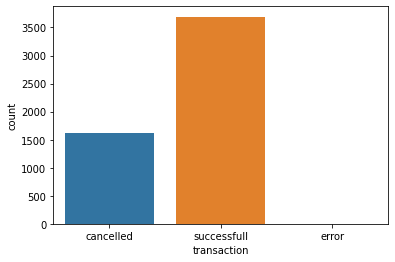

In [59]:
# Построим график распределения всех возможных вариантов транзакций клиентов

def draw_graph_countplot(value):
    sns.countplot(value)
    
draw_graph_countplot(df.transaction)

In [60]:
# Определим сколько транзакций осуществил каждый из пользователей. Посмотрим на характеристики распределения, 
# а затем построим гистограмму числа успешных транзакций, совершённых каждым пользователем

success_client = df.query('transaction == "successfull"').groupby('name').agg({'transaction': 'count'}).reset_index()
success_client.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


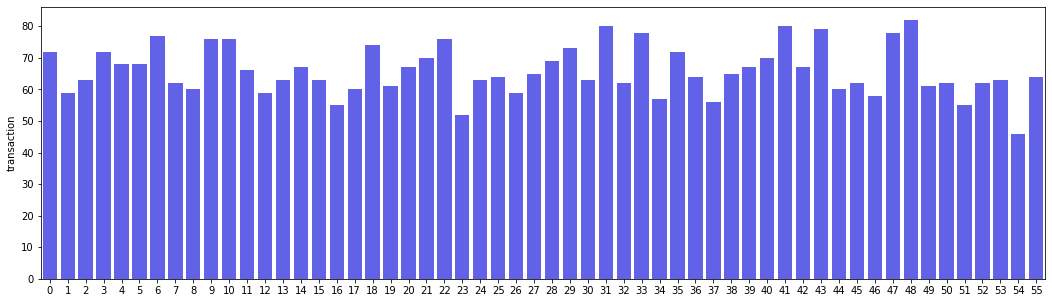

In [61]:
# Построим график распределения количества транзакций по пользователям

plt.figure(figsize=(18, 5))
sns.barplot(x = success_client.index, y = success_client.transaction, color='blue', alpha = 0.7)

In [62]:
# Посмотрим на характеристики полученного выше распределения

success_client.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [120]:
success_client.shape

(56, 2)

In [121]:
# Загрузим датасет с новыми данными, полученными от коллеги

df_new = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv')
df_new.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [125]:
# Проведем группировку новых данных и определим общее количество транзакций у каждого из клиентов

df_new_group = df_new.groupby(['name', 'minute'], as_index = False).agg({'transaction': 'count'})
df_new_group

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [128]:
# Построим сводную таблицу 'user_vs_minute_pivot', где в качестве столбцов будут использованы имена пользователей, 
# строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполним нулями

user_vs_minute_pivot = df_new_group.pivot(index='minute', columns='name', values='transaction').fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [138]:
df['date'] = pd.to_datetime(df['date'])
df['true_minute'] = df['date'].dt.minute + df['date'].dt.hour * 60
df.head()

,date,name,transaction,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


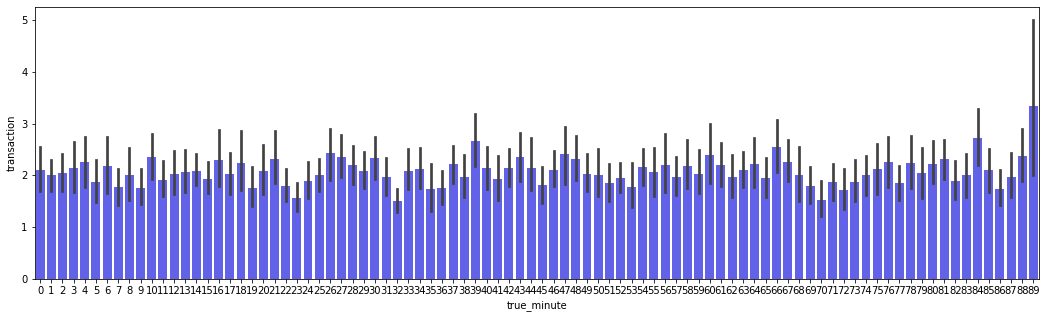

In [143]:
# Построим график по нашей сводной таблице - количества транзакций ко времени её совершения

plt.figure(figsize=(18, 5))
sns.barplot(x = df.true_minute, y = df_new_group.transaction, color='blue', alpha = 0.7)